# Brain Tumor detection

#### ``Objectives``
1. Implement a feedforward NN to detect brain tumor from MRI images taken under a variety of imaging conditions as well as views
2. Improve generalization performance and reduce overfitting using **image transformation** and **data augmentation** techniques
3. Implement a Convolutional NN as a second model to compare accuracy to FNN on the same data

#### ``Dataset``

The data for this model was obtained from Kaggle: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

The problem itself is a multiclass problem and the dataset already segments training and testing data. The data itself contains sub-folders that display the label of the images. The possible labels are: glioma, meningioma and pituitary which classify three different classes of brain tumors as well as notumor which classifies a healthy MRI scan.

In [2]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

#silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

random.seed(2)
%matplotlib inline

# FILL IN CODE HERE #
#training paths
healthy_training_path = '/Users/sayyedjilani/archive/Training/notumor/' # replace with your path 
glioma_training_path = '/Users/sayyedjilani/archive/Training/glioma/' # replace with your path
meningioma_training_path = '/Users/sayyedjilani/archive/Training/meningioma/' # replace with your path
pituitary_training_path = '/Users/sayyedjilani/archive/Training/pituitary/' # replace with your path

#testing paths
healthy_testing_path = '/Users/sayyedjilani/archive/Testing/notumor/' # replace with your path 
glioma_testing_path = '/Users/sayyedjilani/archive/Testing/glioma/' # replace with your path
meningioma_testing_path = '/Users/sayyedjilani/archive/Testing/meningioma/' # replace with your path
pituitary_testing_path = '/Users/sayyedjilani/archive/Testing/pituitary/' # replace with your path

# Read Data

In [3]:
#creating labels for each class - Training
healthy_training_list = [file for file in os.listdir(healthy_training_path) if os.path.isfile(os.path.join(healthy_training_path, file))]
glioma_training_list = [file for file in os.listdir(glioma_training_path) if os.path.isfile(os.path.join(glioma_training_path, file))]
meningioma_training_list = [file for file in os.listdir(meningioma_training_path) if os.path.isfile(os.path.join(meningioma_training_path, file))]
pituitary_training_list = [file for file in os.listdir(pituitary_training_path) if os.path.isfile(os.path.join(pituitary_training_path, file))]

# Create an array of 0's, 1's, 2's and 3's with the same length as the file list for each label
healthy_training_labels = np.zeros(len(healthy_training_list)) #healthy assigned 0
glioma_training_labels = np.ones(len(glioma_training_list)) # glioma cancer assigned 1
meningioma_training_labels = 2 * np.ones(len(meningioma_training_list)) #meningioma cancer assigned 2
pituitary_training_labels = 3 * np.ones(len(pituitary_training_list)) #pituitary cancer assigned 3

print("Healthy Training Labels Shape:", healthy_training_labels.shape)
print("Glioma Training Labels Shape:", glioma_training_labels.shape)
print("Meningioma Training Labels Shape:", meningioma_training_labels.shape)
print("Pituitary Training Labels Shape:", pituitary_training_labels.shape)


#creating labels for each class - Testing
healthy_testing_list = [file for file in os.listdir(healthy_testing_path) if os.path.isfile(os.path.join(healthy_testing_path, file))]
glioma_testing_list = [file for file in os.listdir(glioma_testing_path) if os.path.isfile(os.path.join(glioma_testing_path, file))]
meningioma_testing_list = [file for file in os.listdir(meningioma_testing_path) if os.path.isfile(os.path.join(meningioma_testing_path, file))]
pituitary_testing_list = [file for file in os.listdir(pituitary_testing_path) if os.path.isfile(os.path.join(pituitary_testing_path, file))]

# Create an array of 0's, 1's, 2's and 3's with the same length as the file list for each label
healthy_testing_labels = np.zeros(len(healthy_testing_list))
glioma_testing_labels = np.ones(len(glioma_testing_list))
meningioma_testing_labels = 2 * np.ones(len(meningioma_testing_list))
pituitary_testing_labels = 3 * np.ones(len(pituitary_testing_list))

print("\nHealthy Testing Labels Shape:", healthy_testing_labels.shape)
print("Glioma Testing Labels Shape:", glioma_testing_labels.shape)
print("Meningioma Testing Labels Shape:", meningioma_testing_labels.shape)
print("Pituitary Testing Labels Shape:", pituitary_testing_labels.shape)

Healthy Training Labels Shape: (1595,)
Glioma Training Labels Shape: (1321,)
Meningioma Training Labels Shape: (1339,)
Pituitary Training Labels Shape: (1457,)

Healthy Testing Labels Shape: (405,)
Glioma Testing Labels Shape: (300,)
Meningioma Testing Labels Shape: (306,)
Pituitary Testing Labels Shape: (300,)


Sample of images in Healthy Training Data:


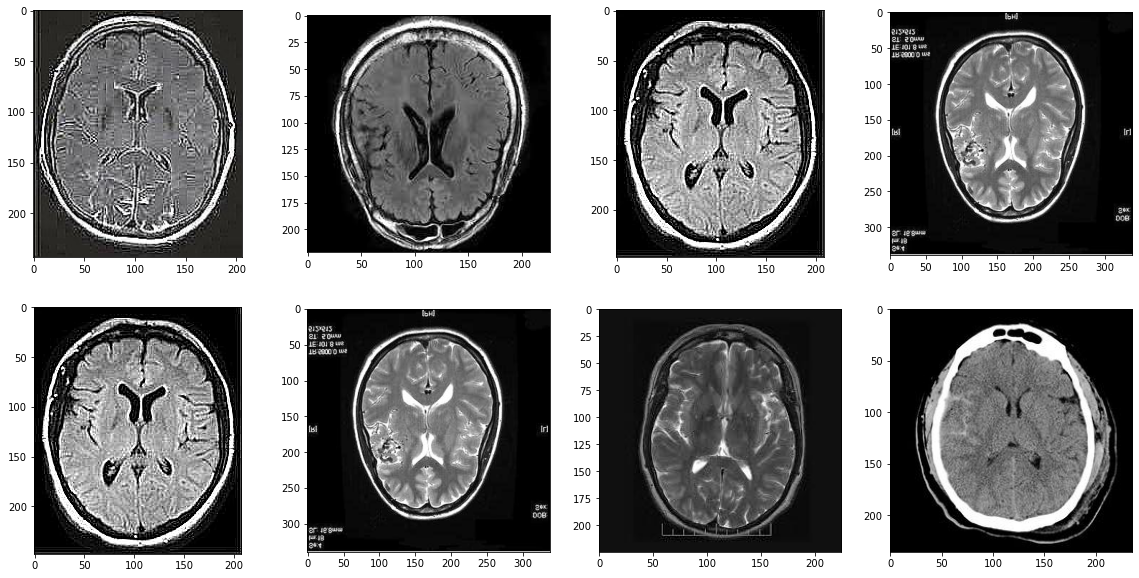


Sample of images in Glioma Training Data:


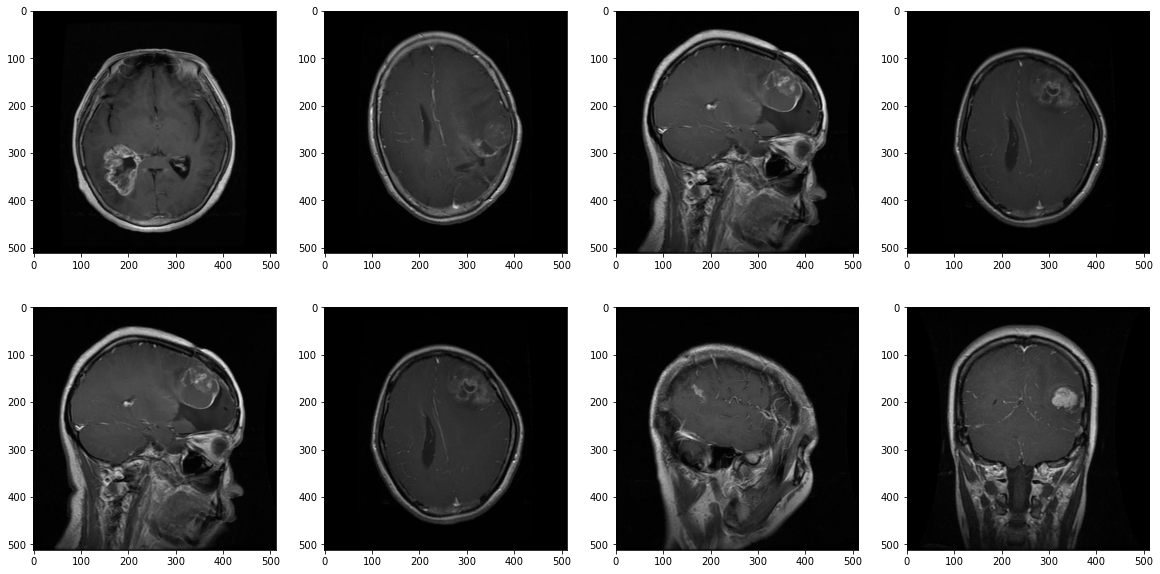


Sample of images in Meningioma Training Data:


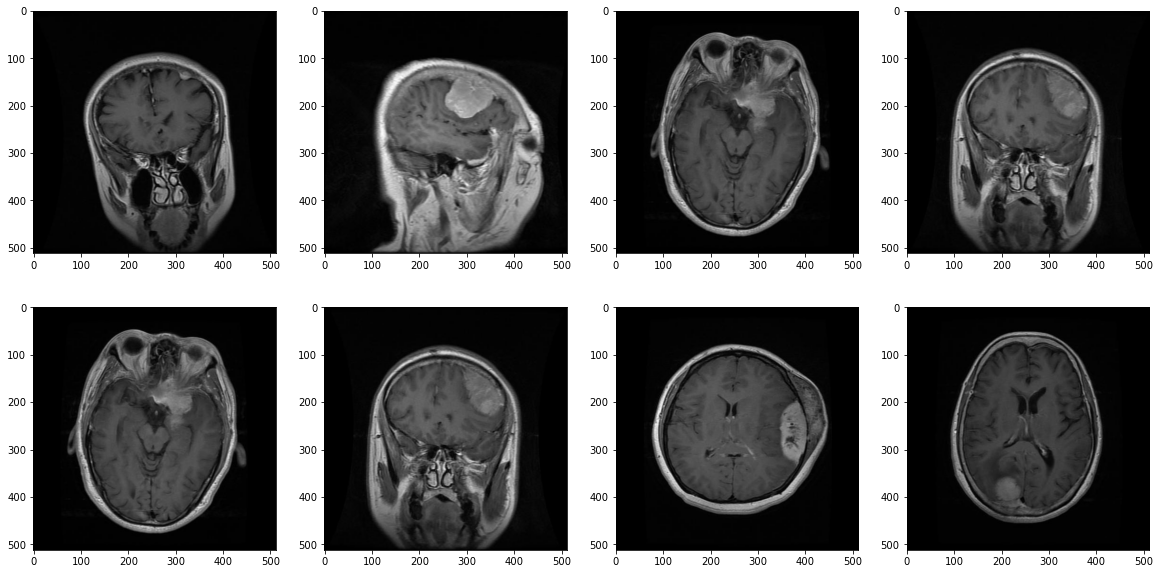


Sample of images in Pituitary Training Data:


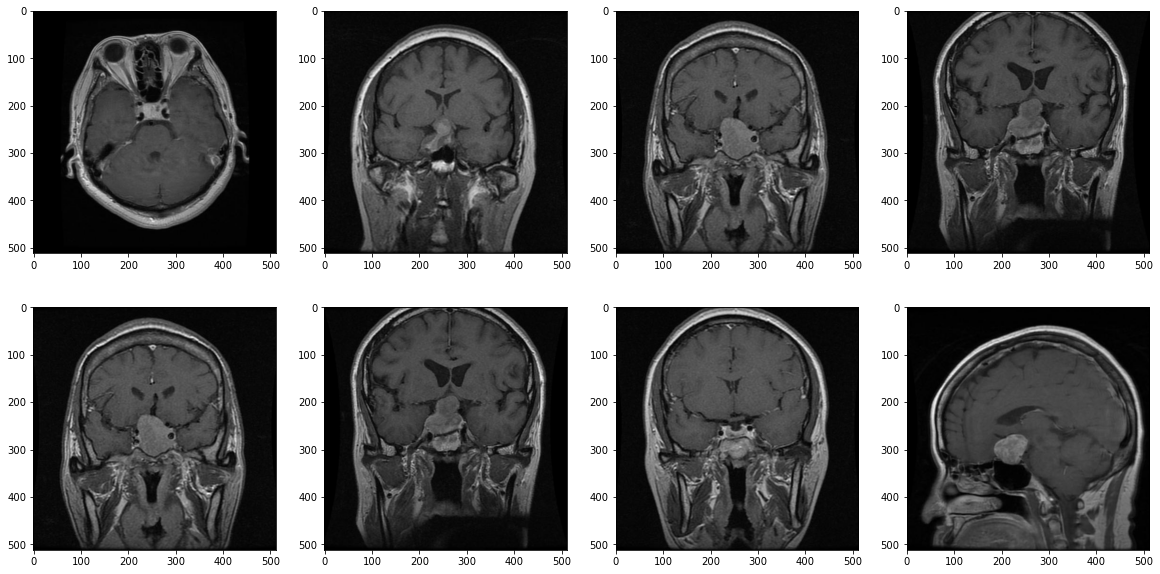

In [4]:
# read image for training
indx=0
healthy_training_images = []
glioma_training_images = []
meningioma_training_images = []
pituitary_training_images = []


print('Sample of images in Healthy Training Data:')
for idx, img in enumerate(healthy_training_list):
    img = load_img(
    healthy_training_path + img)
    healthy_training_images.append(img)
    

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        indx = i*nrows+j
        axs[i,j].imshow(healthy_training_images[indx])
plt.show()
        
print('\nSample of images in Glioma Training Data:')
for idx, img in enumerate(glioma_training_list):
    img = load_img(
    glioma_training_path + img)
    glioma_training_images.append(img)
    

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        indx = i*nrows+j
        axs[i,j].imshow(glioma_training_images[indx])
plt.show()
        
print('\nSample of images in Meningioma Training Data:')
for idx, img in enumerate(meningioma_training_list):
    img = load_img(
    meningioma_training_path + img)
    meningioma_training_images.append(img)
    

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        indx = i*nrows+j
        axs[i,j].imshow(meningioma_training_images[indx])
plt.show()
        
print('\nSample of images in Pituitary Training Data:')
for idx, img in enumerate(pituitary_training_list):
    img = load_img(
    pituitary_training_path + img)
    pituitary_training_images.append(img)
    

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        indx = i*nrows+j
        axs[i,j].imshow(pituitary_training_images[indx])
plt.show()
        


In [5]:
#loading testing images
# read image for training
indx=0
healthy_testing_images = []
glioma_testing_images = []
meningioma_testing_images = []
pituitary_testing_images = []


for idx, img in enumerate(healthy_testing_list):
    img = load_img(
    healthy_testing_path + img)
    healthy_testing_images.append(img)
    
        
for idx, img in enumerate(glioma_testing_list):
    img = load_img(
    glioma_testing_path + img)
    glioma_testing_images.append(img)
    

for idx, img in enumerate(meningioma_testing_list):
    img = load_img(
    meningioma_testing_path + img)
    meningioma_testing_images.append(img)
    
        
for idx, img in enumerate(pituitary_testing_list):
    img = load_img(
    pituitary_testing_path + img)
    pituitary_testing_images.append(img)
    


In [6]:
#compiling all data together 
y_train = np.concatenate((healthy_training_labels,glioma_training_labels,meningioma_training_labels,pituitary_training_labels))
print(y_train.shape)
y_test = np.concatenate((healthy_testing_labels,glioma_testing_labels,meningioma_testing_labels,pituitary_testing_labels))
print(y_test.shape)

X_train_images = healthy_training_images + glioma_training_images + meningioma_training_images + pituitary_training_images
X_test_images = healthy_testing_images + glioma_testing_images + meningioma_testing_images + pituitary_testing_images

#convert images to arrays
X_train = []
for img in X_train_images:
    img = img_to_array(img)
    img = tf.image.resize(img, size=(224, 224)) #resizing all images for standardization
    X_train.append(img)
X_train = np.stack(X_train)

X_test = []
for img in X_test_images:
    img = img_to_array(img)
    img = tf.image.resize(img, size=(224, 224)) #resizing all images for standardization
    X_test.append(img)
X_test = np.stack(X_test)

display(X_train.shape)
display(X_test.shape)

(5712,)
(1311,)


(5712, 224, 224, 3)

(1311, 224, 224, 3)

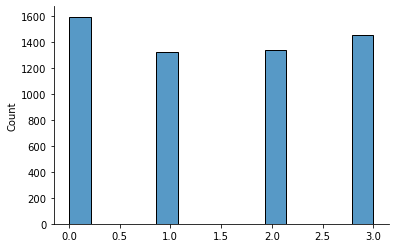

In [7]:
# visualiszing the distribution of classes in training dataset
sns.histplot(
    data=y_train,
    stat="count"
);

sns.despine()


Given that there is an almost equal distribution of data for each class, we can be confident in our training model in utilizing this dataset without any crude data ajdustments to build a multi class model

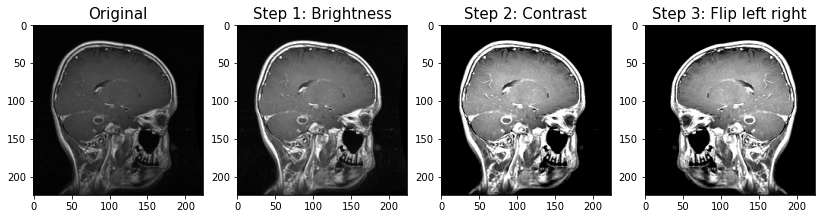

In [8]:
#augmenting images to further add variation in training data

tf.random.set_seed(1234)

fig = plt.figure(figsize=(14, 12))

# pull random image from data to showcase augemntatin effect on images
image = X_test[587]

# plot original
ax = fig.add_subplot(1, 4, 1)
ax.imshow(array_to_img(image))
ax.set_title('Original', size=15);


# adjust brightness
ax = fig.add_subplot(1, 4, 2)
brightness_factor = 1.8  
img_bright = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)
ax.imshow(array_to_img(img_bright))
ax.set_title('Step 1: Brightness', size=15);


# adjust contrast
ax = fig.add_subplot(1, 4, 3)
img_contrast = tf.image.adjust_contrast(img_bright, contrast_factor=2)
ax.imshow(array_to_img(img_contrast))
ax.set_title('Step 2: Contrast', size=15);


# flip left right
ax = fig.add_subplot(1, 4, 4)
img_flip = tf.image.flip_left_right(img_contrast)
ax.imshow(array_to_img(img_flip))
ax.set_title('Step 3: Flip left right', size=15);

In [9]:
BRIGHTNESS_FACTOR = 1.8  
CONTRAST_FACTOR = 2
val_split = 0.2

def preprocess_data(X_train, y_train, val_split=0.2):
    """shuffle training data and training labels and apply transformaions and augmentations to images.
    A validation set is also obtained from the training data
    
    Params:
    -------
    X_train  (np.ndarray): Images of shape (N, 224, 224, 3)
    y (np.ndarray): Labels of shape (N,)   
    val_split = the factor used to split training data into training data and validation data
    
    Returns:
    --------
    X_train (np.ndarray): shuffled Train images of shape (2N, 224, 224, 3) with added augmented data
    y_train (np.ndarray): shuffled Train labels of shape (2N,) with added augmented data
    
    X_val (np.ndarray): validation images of shape (val_split * N,)
    y_val (np.ndarray): validation labels of shape (val_split * N,)
    
    """
    
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator 
    tf.random.set_seed(1234)
    np.random.seed(1234)
    shuffle = np.random.permutation(np.arange(X_train.shape[0]))
    X_train, y_train = X_train[shuffle], y_train[shuffle]
    
    # Split into training and validation sets
    val_size = int(val_split * X_train.shape[0])
    X_val, y_val = X_train[:val_size], y_train[:val_size]
    X_train, y_train = X_train[val_size:], y_train[val_size:]
    
    
    ### image augmentation on training data ###
    
    # adjust brightness
    X_train_augm = np.clip(X_train * BRIGHTNESS_FACTOR, 0, 255)
    
    # adjust contrast
    X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

    # random flip
    X_train_augm = tf.image.random_flip_left_right(X_train_augm)
    
    
    # concatenate original X_train and augmented X_train data
    X_train = tf.concat([X_train, X_train_augm],axis=0)
    
    # concatenate y_train (note the label is preserved)
    y_train_augm = y_train
    y_train = tf.concat([y_train, y_train_augm],axis=0)
    
    # shuffle X_train and y_train
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
    X_train = tf.gather(X_train, shuffle)
    y_train = tf.gather(y_train, shuffle).numpy() #also transforms y_train to numpy array
    
    return X_train, y_train, X_val, y_val

In [10]:
#produce all the data that will be used in training our model 
X_train_data, y_train_data, X_val, y_val = preprocess_data(X_train, y_train, val_split=0.2)

print(f"X_train shape: {X_train_data.shape}")
print(f"y_train shape: {y_train_data.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

#rescale images to [0,1]
X_train_data = tf.image.rgb_to_grayscale(X_train_data)/255.0
X_val_data = tf.image.rgb_to_grayscale(X_val)/255.0
X_test_data = tf.image.rgb_to_grayscale(X_test)/255.0
print(f"X_train shape: {X_train_data.shape}")
print(f"X_val shape: {X_val_data.shape}")
print(f"X_test shape: {X_test_data.shape}")

X_train shape: (9140, 224, 224, 3)
y_train shape: (9140,)
X_val shape: (1142, 224, 224, 3)
y_val shape: (1142,)
X_train shape: (9140, 224, 224, 1)
X_val shape: (1142, 224, 224, 1)
X_test shape: (1311, 224, 224, 1)


Print training data examples:


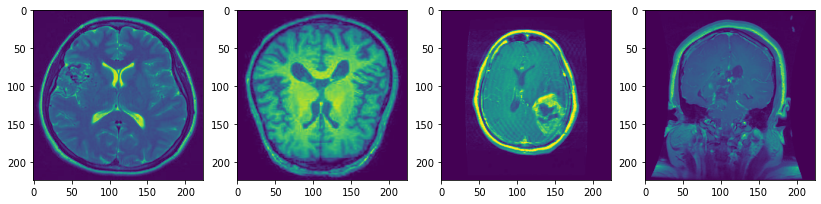

In [11]:
# print taining data
print('Print training data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train_data[i]))

Print validation data examples:


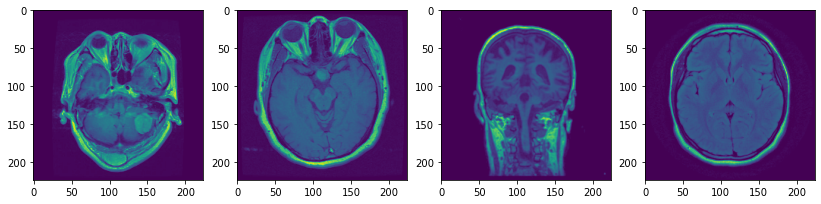

In [12]:
# print validation data
print('Print validation data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_val_data[i]))

# Model

Our objective is to build and train a multi-class Brain Cancer detection model to continue diagnosing the different kinds of tumor correctly. We are interested in exploring Multi classification of the the three different kinds of tumors along with healthy scans

<u>The architecture of our NN model is as follows</u>:

1. the model receives input images of size 224 x 224 x 1
2. the input data goes through a flattening layer
3. the flatten input goes through four connected layers, followed by a dropout layer to prevent overfitting and make our data more generalizable

For the dropout layer, we set the probability of dropping input units during training to 0.2 

We will implement this architecture using TensorFlow Keras API.

In [27]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# first layer: input
input1 = tf.keras.layers.Input(shape=(224, 224, 1), name='Input')

# second layer: flatten (transforms the format of the images (to a 1D array of 224*224 = 50176 pixels)
# this layer only reformats data
input2 = tf.keras.layers.Flatten(name='Flatten')(input1)

# third layer has 6272 nodes, and it uses the activation function Rectified Linear Unit
input3 = tf.keras.layers.Dense(units=6272, activation='relu', name='fc_1')(input2)

# fourth layer has 1568 nodes, and it uses the activation function Rectified Linear Unit
input4 = tf.keras.layers.Dense(units=1568, activation='relu', name='fc_2')(input3)
    
# fifth layer has 392 nodes, and it uses the activation function Rectified Linear Unit
input5 = tf.keras.layers.Dense(units=392, activation='relu', name='fc_3')(input4) 

# sixth layer has 98 nodes, and it uses the activation function Rectified Linear Unit
input6 = tf.keras.layers.Dense(units=98, activation='relu', name='fc_4')(input5)

# seventh layer: dropout
# makes it so some of the nodes in a given layer don’t pass on their information to the next layer. 
# This helps with computation time (less parameters) and with overfitting.
# each node in the third layer has a 0.2 probability of being dropped from the computation of the activations of the next layer. 
input7 = tf.keras.layers.Dropout(rate=0.2, name='Dropout')(input6)

#the eighth (and last) layer, which is the output layer
# this last layer sets the activation function to "Softmax" in order to output a probability of each classification
# set units=4 to get a 4 output units, each providing probability of each class
out = tf.keras.layers.Dense(units=4, activation='softmax', name='fc_5')(input7)

# instantiate the model
model = tf.keras.models.Model(inputs=input1, outputs=out)

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy', #sparse categorical crossentropy used since multi-class logistic regressions used
              metrics=['accuracy']) 

In [29]:
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(X_train_data, y_train_data,
                    epochs=5, 
                    batch_size=32,
                    validation_data=(X_val_data, y_val),
                    verbose=1)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/5
286/286 [==============================] - 781s 3s/step - loss: 2.8453 - accuracy: 0.5103 - val_loss: 0.9281 - val_accuracy: 0.5525
Epoch 2/5
286/286 [==============================] - 751s 3s/step - loss: 0.7279 - accuracy: 0.6931 - val_loss: 0.6683 - val_accuracy: 0.7180
Epoch 3/5
286/286 [==============================] - 749s 3s/step - loss: 0.6056 - accuracy: 0.7464 - val_loss: 0.5918 - val_accuracy: 0.7583
Epoch 4/5
286/286 [==============================] - 750s 3s/step - loss: 0.5344 - accuracy: 0.7731 - val_loss: 0.5380 - val_accuracy: 0.7863
Epoch 5/5
286/286 [==============================] - 750s 3s/step - loss: 0.4845 - accuracy: 0.7946 - val_loss: 0.5634 - val_accuracy: 0.7785


loss  accuracy  val_loss  val_accuracy
0  2.845320  0.510284  0.928105      0.552539
1  0.727940  0.693107  0.668317      0.718038
2  0.605611  0.746390  0.591843      0.758319
3  0.534418  0.773085  0.537957      0.786340
4  0.484549  0.794639  0.563411      0.778459

In [30]:
#saving history data as csv
hist_csv = 'history.csv'
with open(hist_csv, mode = 'w') as f:
    history.to_csv(f)

In [31]:
tf.random.set_seed(1234)
np.random.seed(1234)
history_2 = model.fit(X_train_data, y_train_data,
                    epochs=10, 
                    batch_size=64,
                    validation_data=(X_val_data, y_val),
                    verbose=1)

history_2 = pd.DataFrame(history_2.history)
display(history_2)

Epoch 1/10
143/143 [==============================] - 384s 3s/step - loss: 0.3477 - accuracy: 0.8444 - val_loss: 0.4644 - val_accuracy: 0.8371
Epoch 2/10
143/143 [==============================] - 393s 3s/step - loss: 0.2937 - accuracy: 0.8767 - val_loss: 0.5109 - val_accuracy: 0.8389
Epoch 3/10
143/143 [==============================] - 379s 3s/step - loss: 0.2515 - accuracy: 0.8982 - val_loss: 0.5487 - val_accuracy: 0.8389
Epoch 4/10
143/143 [==============================] - 375s 3s/step - loss: 0.2168 - accuracy: 0.9181 - val_loss: 0.4865 - val_accuracy: 0.8634
Epoch 5/10
143/143 [==============================] - 374s 3s/step - loss: 0.2126 - accuracy: 0.9148 - val_loss: 0.5369 - val_accuracy: 0.8599
Epoch 6/10
143/143 [==============================] - 374s 3s/step - loss: 0.1769 - accuracy: 0.9328 - val_loss: 0.5634 - val_accuracy: 0.8634
Epoch 7/10
143/143 [==============================] - 375s 3s/step - loss: 0.1401 - accuracy: 0.9499 - val_loss: 0.6257 - val_accuracy: 0.8546

loss  accuracy  val_loss  val_accuracy
0  0.347740  0.844420  0.464450      0.837128
1  0.293689  0.876696  0.510889      0.838879
2  0.251479  0.898249  0.548721      0.838879
3  0.216813  0.918052  0.486467      0.863398
4  0.212636  0.914770  0.536946      0.859895
5  0.176949  0.932823  0.563431      0.863398
6  0.140057  0.949891  0.625730      0.854641
7  0.158053  0.942341  0.501562      0.838004
8  0.095004  0.967834  0.574831      0.891419
9  0.120978  0.960941  0.552109      0.856392

In [32]:
#saving history data as csv
hist_csv = 'history_2.csv'
with open(hist_csv, mode = 'w') as f:
    history_2.to_csv(f)

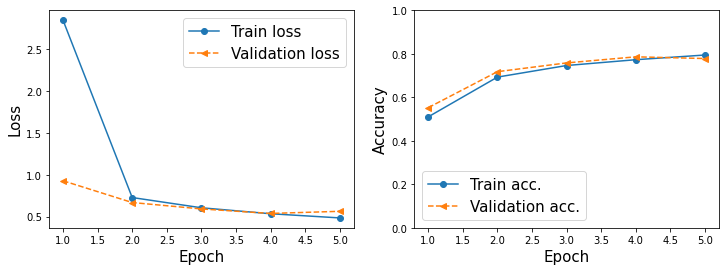

In [36]:
#model evaluation - 5 epochs, batch size - 32
x_arr = np.arange(len(history['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, history['loss'], '-o', label='Train loss')
ax.plot(x_arr, history['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, history['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, history['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_ylim(0,1)
plt.show()

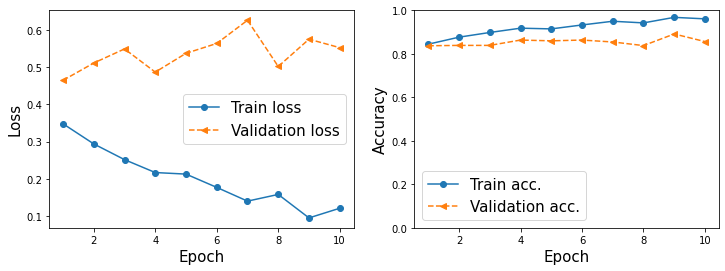

In [37]:
#model evaluation - 10 epochs, batch size - 64
x_arr = np.arange(len(history_2['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, history_2['loss'], '-o', label='Train loss')
ax.plot(x_arr, history_2['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, history_2['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, history_2['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_ylim(0,1)
plt.show()

The validation loss is substantially larger than the training loss, and generally with each epoch, the validation loss had increased. This demonstrates potential overfitting to the training data.

# Evaluation

In [89]:
test_results = model.evaluate(X_test_data, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

41/41 [==============================] - 4s 105ms/step - loss: 0.5207 - accuracy: 0.8482

Test Acc. 84.82%


In [49]:
test_predictions = np.argmax(model.predict(X_test_data), axis=-1)
print(test_predictions)

41/41 [==============================] - 4s 106ms/step
[0 0 0 ... 3 3 3]


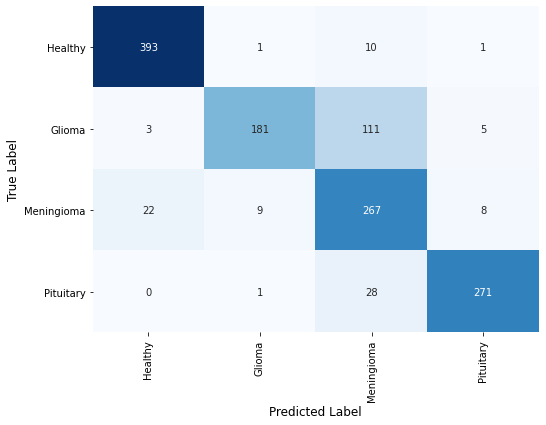

In [68]:
# Create a confusion matrix as a 2D array.
label_names = ['Healthy', 'Glioma', 'Meningioma', 'Pituitary'] #correspond to 0, 1, 2, 3 respectively 
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(8, 6))

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues', xticklabels=label_names, yticklabels=label_names, cbar=False)


ax.set(xlabel='Predicted Label', ylabel='True Label') 
ax.set_xticklabels(label_names, rotation=90)
ax.set_yticklabels(label_names, rotation=0)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
plt.show()

The correlation matrix demonstartes the false positives and the false negatives. As seen by the plot, a substantial amount of Glioma are being wrongly classified as Meningioma. Given that the major difference between the cancers comes from their formation - meningiomas form from the meninges in the brain, whereas gliomas come from glial cells in the entrance to the spinal cord  - this could indicate that visually differentiating the two types of cancers can be difficult.

41/41 [==============================] - 4s 108ms/step


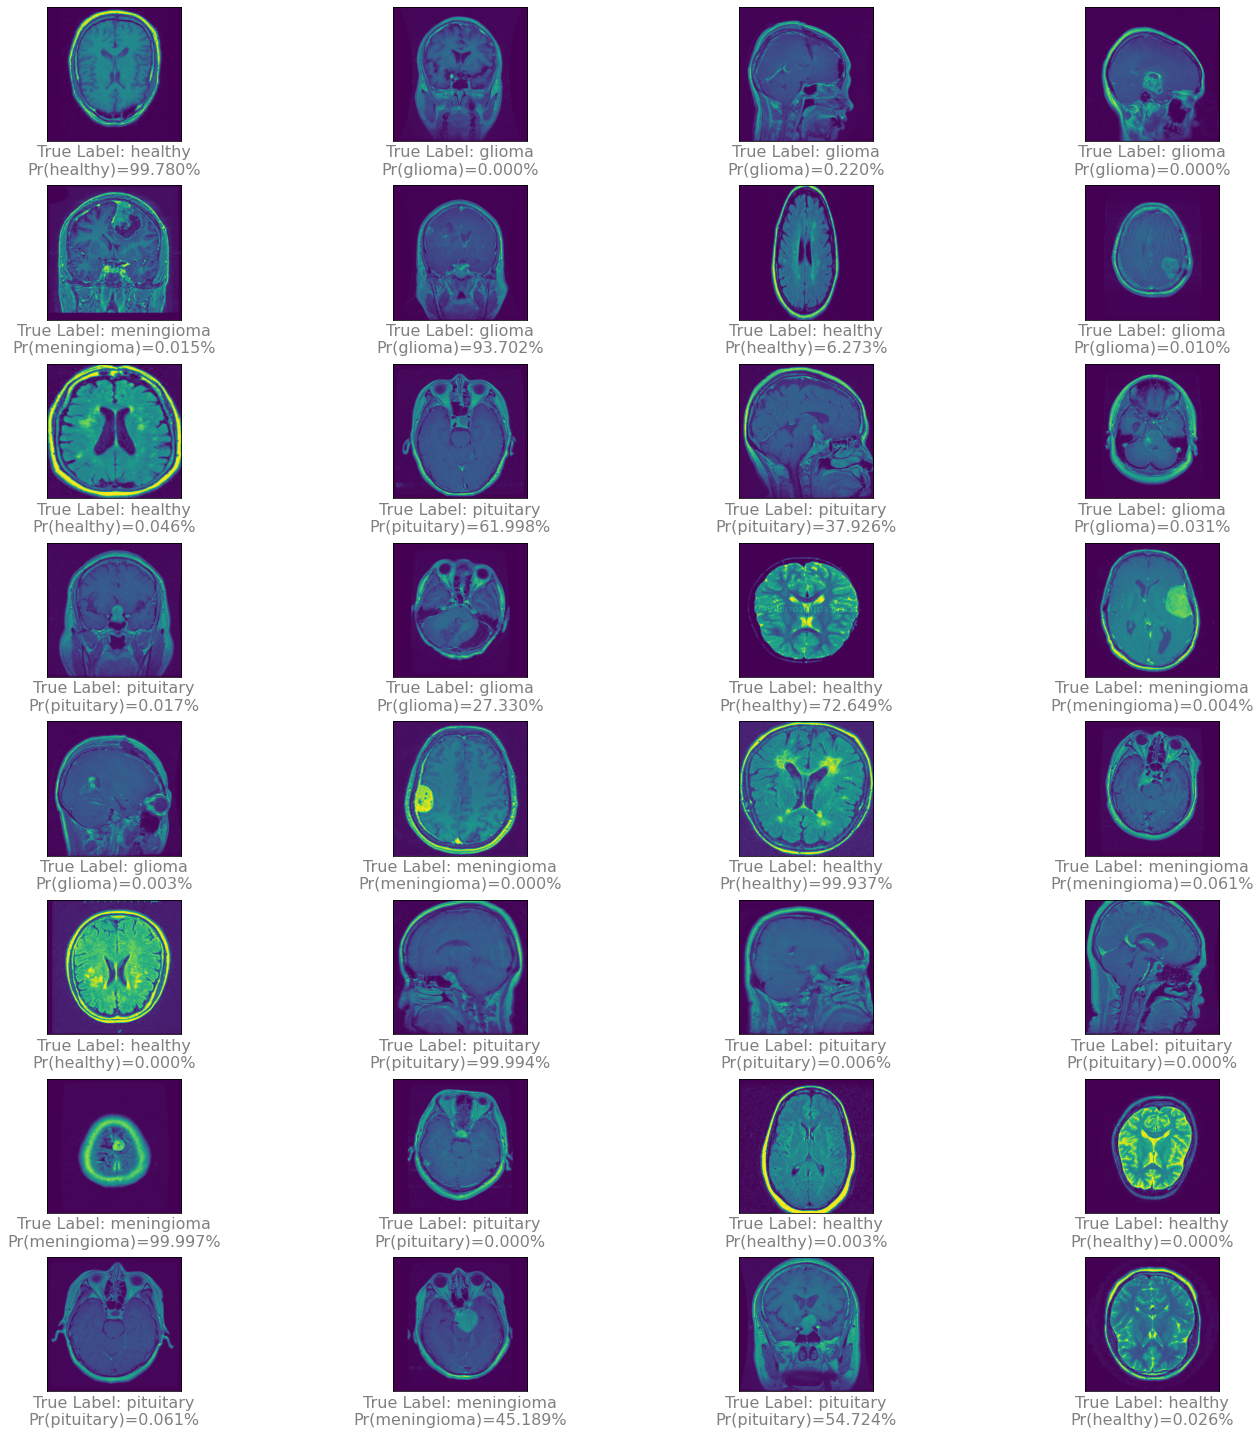

In [103]:
#shuffling test data as data is in order of 0's, 1's, 2's and 3's - won't provide variety in comparison otherwise
np.random.seed(12345)
indices = np.arange(X_test_data.shape[0])
np.random.shuffle(indices)
X_test_data = X_test_data.numpy()[indices]
y_test = y_test[indices]

prob = model.predict(X_test_data).flatten()*100

# plot test data and associated predicted
fig = plt.figure(figsize=(20, 20))

num_subplots = min(len(X_test_data), 32)  # Limit the number of subplots to the available space

for j in range(num_subplots):
    ax = fig.add_subplot(8, 4, j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(array_to_img(X_test_data[j]))
    
    true_label = ""
    if y_test[j] == 0:
        true_label = 'healthy'
    elif y_test[j] == 1:
        true_label = 'glioma'
    elif y_test[j] == 2:
        true_label = 'meningioma'
    elif y_test[j] == 3:
        true_label = 'pituitary'
        
    ax.text(
        0.5, -0.15,
        "True Label: {}\nPr({})={:.3f}%".format(true_label, true_label, prob[j]),
        size=16,
        color='grey',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)
    
plt.tight_layout()
plt.show()


In conclusion, this part of the notebook presented the implementation of a feedforward neural network for the detection of brain tumors from MRI images. Due to hardware limitations, the models were trained with restricted hyperparameters, focusing on batch size and number of epochs. Nevertheless, by experimenting with these hyperparameters, significant changes in training accuracy and validation accuracy were observed. However, it is important to note that other hyperparameters, such as the number of neurons in each layer, can also be adjusted to further optimize model performance.

The results highlight the importance of fine-tuning hyperparameters to achieve optimal model performance. Future work should involve further exploration of hyperparameter tuning, including adjusting learning rates, regularization techniques, and network architecture. 

Other models like Convolutional Neural Networks can possibly output a greater accuracy as they are able to better identify image invariance from training and will be utilized below.


# Convolutional Neural Networks

Building Model # 2:

In [ ]:
#CNN model being run on a separate date than FNN model as such requires shuffling of test data
np.random.seed(12345)
indices = np.arange(X_test_data.shape[0])
np.random.shuffle(indices)
X_test_data = X_test_data.numpy()[indices]
y_test = y_test[indices]

In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# First layer: input
model = tf.keras.Sequential()

# Second layer: Convolutional layer with 12 filters, kernel size of 5, and ReLU activation
model.add(tf.keras.layers.Conv2D(filters=12, kernel_size=5, activation='relu', padding='same'))

# Third layer: MaxPooling layer with pool size of 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Fourth layer: Convolutional layer with 6 filters, kernel size of 3, and ReLU activation
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=3, activation='relu', padding='same'))

# Fifth layer: MaxPooling layer with pool size of 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Sixth layer: Flatten layer to transform data to a 1D array
model.add(tf.keras.layers.Flatten())

# Seventh layer: Dense layer with 4 units (output classes) and softmax activation
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy', #sparse categorical crossentropy used since multi-class logistic regressions used
              metrics=['accuracy']) 



In [19]:
tf.random.set_seed(1234)
np.random.seed(1234)

cnn_history = model.fit(X_train_data, y_train_data,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val_data, y_val),
                    verbose=1)

cnn_history = pd.DataFrame(cnn_history.history)
display(cnn_history)


Epoch 1/10
143/143 [==============================] - 77s 531ms/step - loss: 0.7667 - accuracy: 0.7102 - val_loss: 0.6307 - val_accuracy: 0.7828
Epoch 2/10
143/143 [==============================] - 76s 529ms/step - loss: 0.4032 - accuracy: 0.8583 - val_loss: 0.4445 - val_accuracy: 0.8581
Epoch 3/10
143/143 [==============================] - 75s 526ms/step - loss: 0.2659 - accuracy: 0.9108 - val_loss: 0.3781 - val_accuracy: 0.8809
Epoch 4/10
143/143 [==============================] - 75s 527ms/step - loss: 0.2151 - accuracy: 0.9271 - val_loss: 0.3544 - val_accuracy: 0.9028
Epoch 5/10
143/143 [==============================] - 77s 535ms/step - loss: 0.1321 - accuracy: 0.9592 - val_loss: 0.3591 - val_accuracy: 0.8862
Epoch 6/10
143/143 [==============================] - 78s 544ms/step - loss: 0.1043 - accuracy: 0.9685 - val_loss: 0.3053 - val_accuracy: 0.9107
Epoch 7/10
143/143 [==============================] - 76s 534ms/step - loss: 0.0700 - accuracy: 0.9800 - val_loss: 0.3085 - val_ac

loss  accuracy  val_loss  val_accuracy
0  0.766718  0.710175  0.630701      0.782837
1  0.403170  0.858315  0.444540      0.858144
2  0.265903  0.910832  0.378084      0.880911
3  0.215147  0.927134  0.354368      0.902802
4  0.132081  0.959190  0.359127      0.886165
5  0.104252  0.968490  0.305292      0.910683
6  0.069953  0.979978  0.308543      0.907180
7  0.057426  0.983917  0.355640      0.907180
8  0.054682  0.985230  0.326929      0.906305
9  0.041105  0.989825  0.371071      0.915061

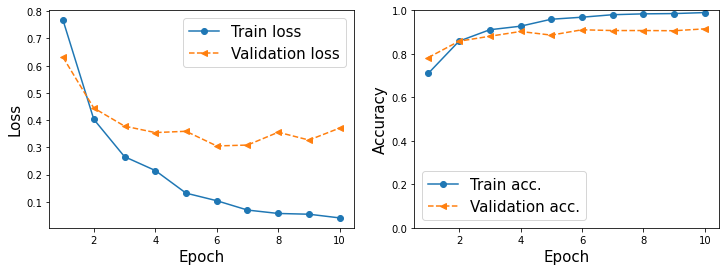

In [29]:
#model evaluation
x_arr = np.arange(len(cnn_history['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, cnn_history['loss'], '-o', label='Train loss')
ax.plot(x_arr, cnn_history['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, cnn_history['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, cnn_history['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_ylim(0,1)
plt.show()

## CNN Evaluation

In [22]:
#evaluate CNN against test data
test_results = model.evaluate(X_test_data, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

41/41 [==============================] - 2s 50ms/step - loss: 0.3442 - accuracy: 0.9108

Test Acc. 91.08%


In [23]:
test_predictions = np.argmax(model.predict(X_test_data), axis=-1)
print(test_predictions)

41/41 [==============================] - 2s 53ms/step
[0 2 1 ... 0 3 1]


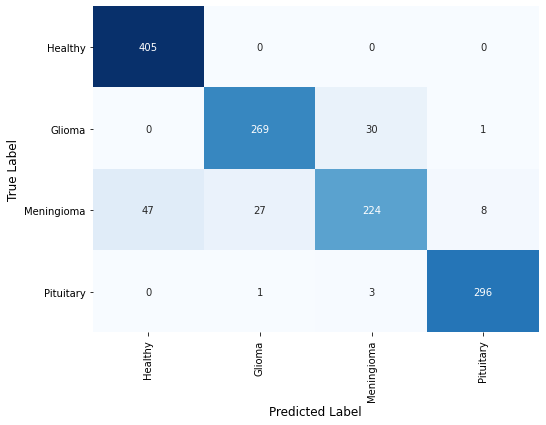

In [26]:
# Create a confusion matrix as a 2D array.
label_names = ['Healthy', 'Glioma', 'Meningioma', 'Pituitary'] #correspond to 0, 1, 2, 3 respectively 
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(8, 6))

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues', xticklabels=label_names, yticklabels=label_names, cbar=False)


ax.set(xlabel='Predicted Label', ylabel='True Label') 
ax.set_xticklabels(label_names, rotation=90)
ax.set_yticklabels(label_names, rotation=0)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
plt.show()

41/41 [==============================] - 2s 51ms/step


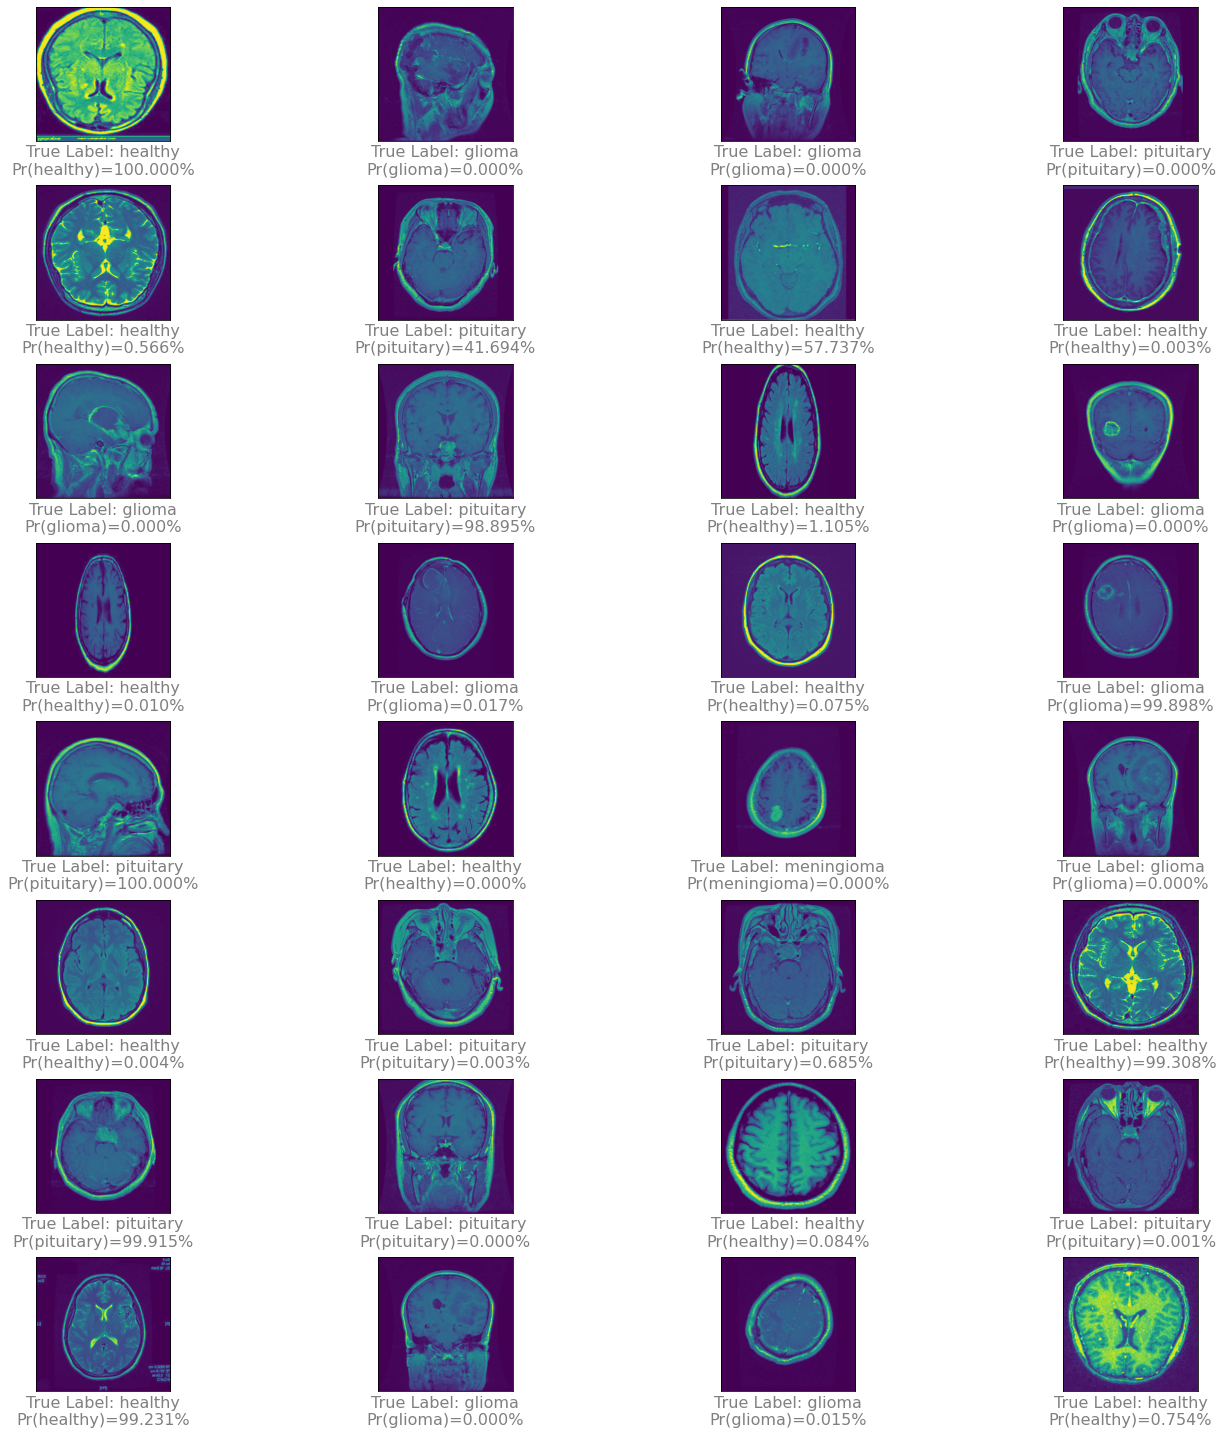

In [30]:
np.random.seed(12345)

prob = model.predict(X_test_data).flatten()*100

# plot test data and associated predicted
fig = plt.figure(figsize=(20, 20))

num_subplots = min(len(X_test_data), 32)  # Limit the number of subplots to the available space

for j in range(num_subplots):
    ax = fig.add_subplot(8, 4, j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(array_to_img(X_test_data[j]))
    
    true_label = ""
    if y_test[j] == 0:
        true_label = 'healthy'
    elif y_test[j] == 1:
        true_label = 'glioma'
    elif y_test[j] == 2:
        true_label = 'meningioma'
    elif y_test[j] == 3:
        true_label = 'pituitary'
        
    ax.text(
        0.5, -0.15,
        "True Label: {}\nPr({})={:.3f}%".format(true_label, true_label, prob[j]),
        size=16,
        color='grey',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)
    
plt.tight_layout()
plt.show()

The implementation of the Convolutional Neural Network (CNN) in this project has proven to be highly effective in accurately detecting brain tumors. The CNN model showcased superior performance compared to the Fully Connected Neural Network (FNN) model when evaluating the test data. While it is important to note that the test data was shuffled differently between the models, limiting the direct comparison, the CNN model consistently demonstrated higher accuracy and produced promising results.

To further enhance the accuracy of the brain tumor detection model, various hyperparameters can be optimized, including the number of filters, epochs, batch sizes, and the overall architecture of the network. Fine-tuning these hyperparameters can lead to even more precise and reliable predictions. Additionally, incorporating advanced techniques like transfer learning or ensemble models may provide further improvements and expand the capabilities of the model.

The success of this project sets a strong foundation for future advancements in medical image analysis. By leveraging the potential of the CNN model and exploring additional techniques, accurate and efficient brain tumor diagnosis can be achieved.